In [1]:
library(SpatEntropy)
library(ggplot2)
library(stats)
library(factoextra)
library(clusterCrit)
library(scatterplot3d)

Loading required package: spatstat
Loading required package: spatstat.data
Loading required package: nlme
Loading required package: rpart

spatstat 1.58-2       (nickname: ‘Not Even Wrong’) 
For an introduction to spatstat, type ‘beginner’ 

Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


In [2]:
#cargar
df <- read.csv(file = '../../../../dataframes/envipe/2016/tmod_vic_envipe2016_09_impute.csv')
#df <- read.csv(file = '../../../../dataframes/envipe/2016/tmod_vic_envipe2016_09_impute.csv')
data <- df
head(data)

BPCOD,BP1_1,BP1_2C,BP1_3C,BP1_4,BP1_5,BP1_6,BP1_20,BP1_23,BP1_30,BP1_33
5,11,9,9-2,3,6,1,2,4,2,1
5,12,9,9-2,3,6,1,2,7,2,1
5,11,9,9-2,1,1,1,2,8,2,1
5,12,9,9-2,3,6,1,2,3,2,1
5,6,9,9-2,2,1,1,2,4,2,1
9,99,9,9-2,2,2,1,2,4,2,5


In [3]:
data_names <- c()
data_entropy <- c()

for (column in 1:ncol(data)) {
  entropy <- SpatEntropy::shannonX(data = matrix(data[column]))
  
  data_names <- append(x = data_names, values = names(data[column]))
  data_entropy <- append(x = data_entropy, values = entropy$shannon)
}

In [4]:
df_entropy <- cbind(data.frame(data_names, data_entropy)) 
df_entropy

data_names,data_entropy
BPCOD,1.9957242
BP1_1,2.4436606
BP1_2C,0.1088806
BP1_3C,2.6432272
BP1_4,1.3753266
BP1_5,1.4697022
BP1_6,0.6032177
BP1_20,0.3828747
BP1_23,1.7268943
BP1_30,0.2127714


In [5]:
order_df_entropy <- df_entropy[order(df_entropy$data_entropy, decreasing = T), ]
order_df_entropy

,data_names,data_entropy
4,BP1_3C,2.6432272
2,BP1_1,2.4436606
1,BPCOD,1.9957242
9,BP1_23,1.7268943
6,BP1_5,1.4697022
5,BP1_4,1.3753266
11,BP1_33,0.9284591
7,BP1_6,0.6032177
8,BP1_20,0.3828747
10,BP1_30,0.2127714


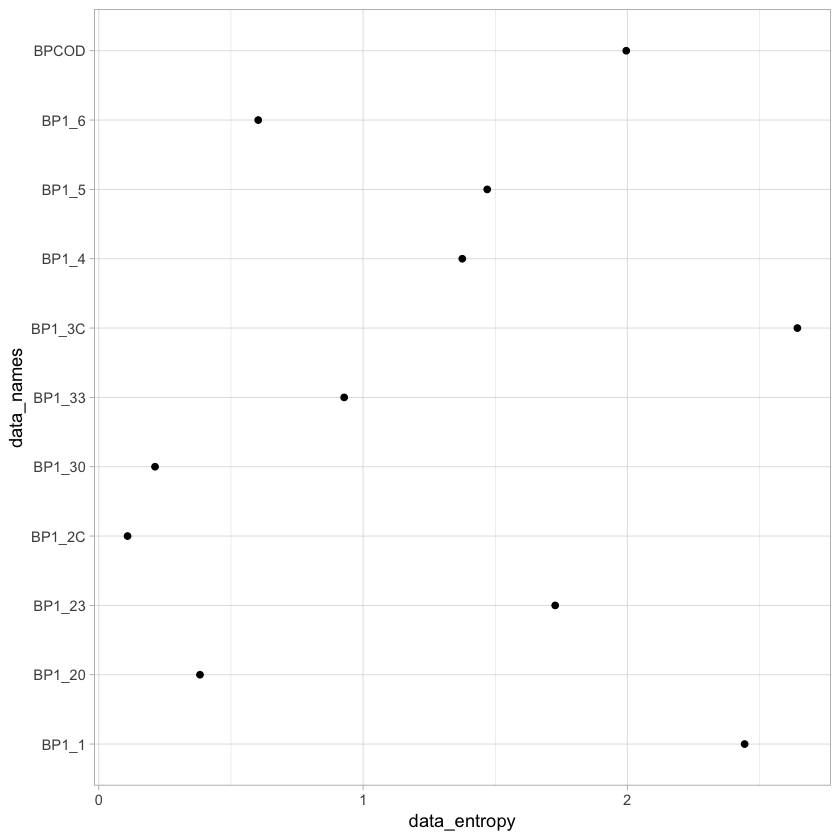

In [6]:
ggplot(df_entropy, 
       aes(y=data_names, x=data_entropy)) + geom_point() + theme_light()

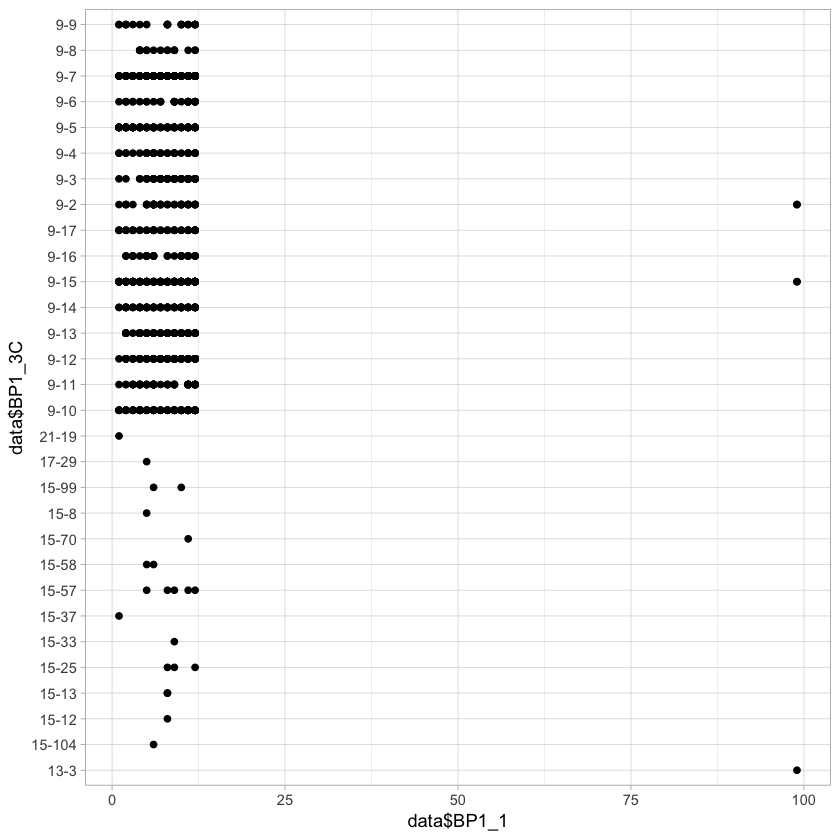

In [7]:
ggplot(data = data, 
       aes(y=data$BP1_3C, 
           x=data$BP1_1)) + geom_point() + theme_light()

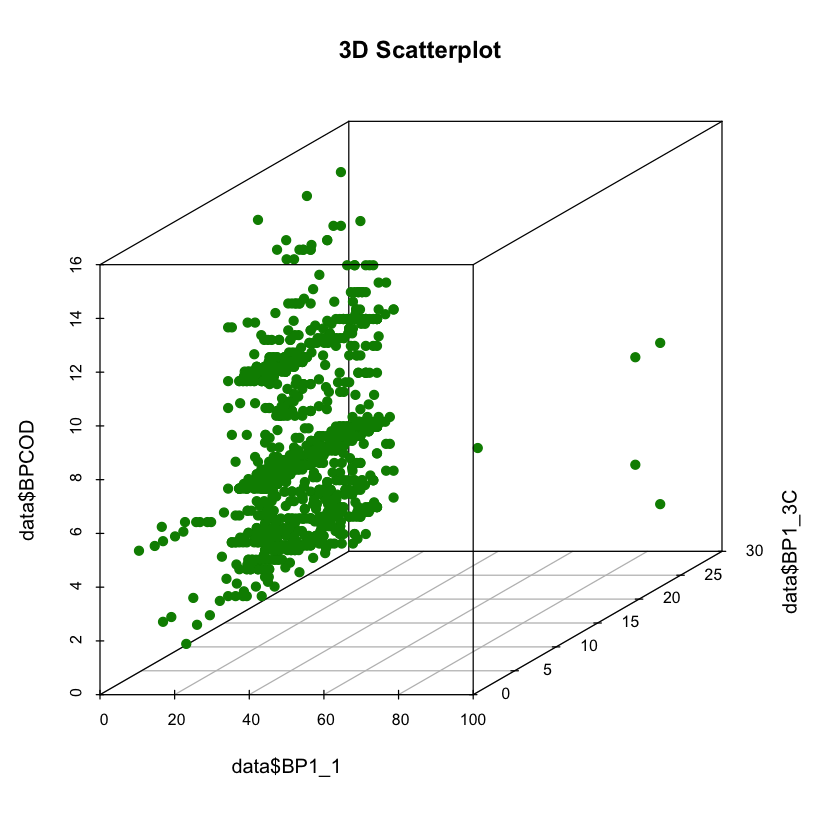

In [8]:
scatterplot3d(y=data$BP1_3C, 
              x=data$BP1_1,
              z=data$BPCOD, pch = 19, color = "green4", main="3D Scatterplot")

In [15]:
library(cluster)
#' Compute Gower distance
gower_dist <- daisy(df, metric = "gower")
head(gower_dist)

Warning message in daisy(df, metric = "gower"):
“binary variable(s) 7, 8, 10 treated as interval scaled”

[1] 0.003710575 0.083256030 0.001855288 0.072820037 0.209879406 0.253710575

In [16]:
gower_mat <- as.matrix(gower_dist)
head(gower_mat)

1,2,3,4,5,6,7,8,9,10,⋯,1138,1139,1140,1141,1142,1143,1144,1145,1146,1147
0.000000000,0.003710575,0.08325603,0.001855288,0.07282004,0.2098794,0.2537106,0.002782931,0.06052876,0.06887755,⋯,0.2641466,0.2261132,0.2110390,0.3304731,0.1968924,0.2291280,0.3147032,0.4132653,0.1523655,0.3429963
0.003710575,0.000000000,0.08140074,0.003710575,0.07653061,0.2117347,0.2555659,0.002782931,0.06423933,0.06702226,⋯,0.2660019,0.2279685,0.2128942,0.3323284,0.1987477,0.2328386,0.3184137,0.4132653,0.1560761,0.3467069
0.083256030,0.081400742,0.00000000,0.085111317,0.01971243,0.1794991,0.2233302,0.082328386,0.03014842,0.03107607,⋯,0.3000928,0.1484230,0.1560761,0.3891466,0.1665121,0.2214750,0.2843228,0.3564471,0.2128942,0.3807978
0.001855288,0.003710575,0.08511132,0.000000000,0.07467532,0.2098794,0.2537106,0.004638219,0.06238404,0.07073284,⋯,0.2660019,0.2279685,0.2128942,0.3323284,0.1950371,0.2309833,0.3165584,0.4151206,0.1542208,0.3429963
0.072820037,0.076530612,0.01971243,0.074675325,0.00000000,0.1690631,0.2128942,0.073747681,0.01229128,0.01878479,⋯,0.2878015,0.1532931,0.1382189,0.3805659,0.1560761,0.2300557,0.2646104,0.3404453,0.1931818,0.3838126
0.209879406,0.211734694,0.17949907,0.209879406,0.16906308,0.0000000,0.2094156,0.212662338,0.17949907,0.18784787,⋯,0.4285714,0.3223562,0.3072820,0.5176252,0.3140074,0.2799165,0.4336735,0.5095083,0.3395176,0.5301484


In [17]:
data <- gower_mat

range_k = 2:10
dunn_kmeans <- c()
set.seed(123)

for (k in range_k) {
  set.seed(123)
  
  kmeans <- stats::kmeans(x = data, centers = k, nstart = 25)
  
  index_internal_kmeans <- clusterCrit::intCriteria(traj = data,
                                                    part = as.integer(kmeans$cluster), 
                                                    #part = kmeans$cluster, 
                                                    crit = "dunn")
  dunn_kmeans[k-1] <- index_internal_kmeans$dunn
}

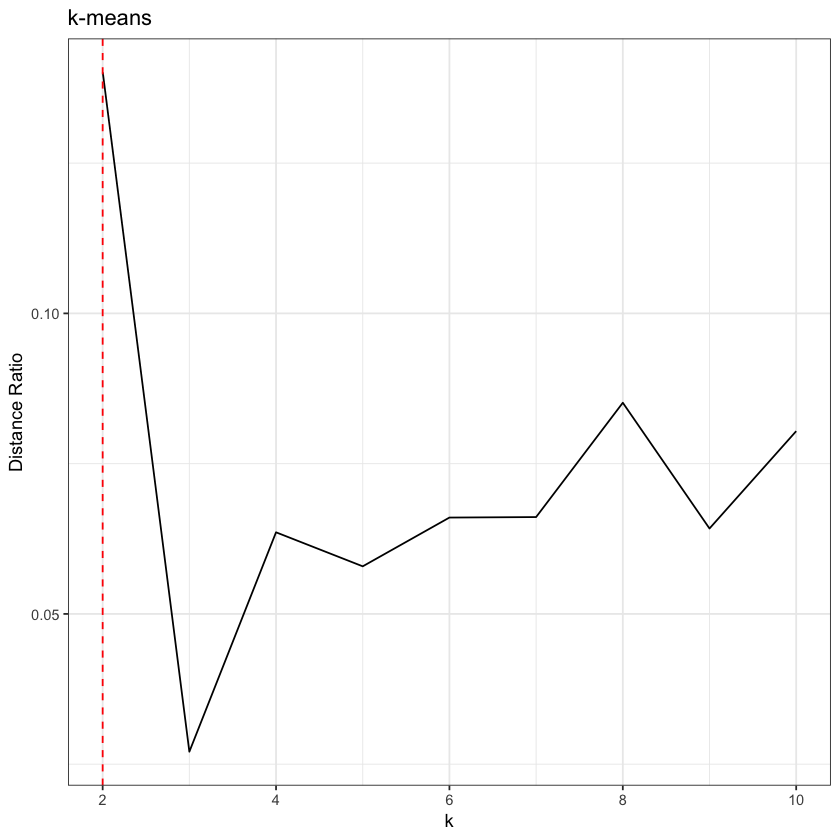

In [18]:
plot_dunn_kmeans <- ggplot2::qplot(x = range_k, 
                                   y = dunn_kmeans, 
                                   geom = 'line', 
                                   main = 'k-means', 
                                   xlab = 'k', 
                                   ylab = 'Distance Ratio')

plot_dunn_kmeans <- plot_dunn_kmeans  + 
  theme_bw() + #ylim(0,0.3) + 
  geom_vline(xintercept = range_k[which.max(dunn_kmeans)],
             linetype = 2, color='red')   
#ggsave(filename = "../../images/enh/dunn_kmeans_2_15.png", dpi = 300)

plot_dunn_kmeans

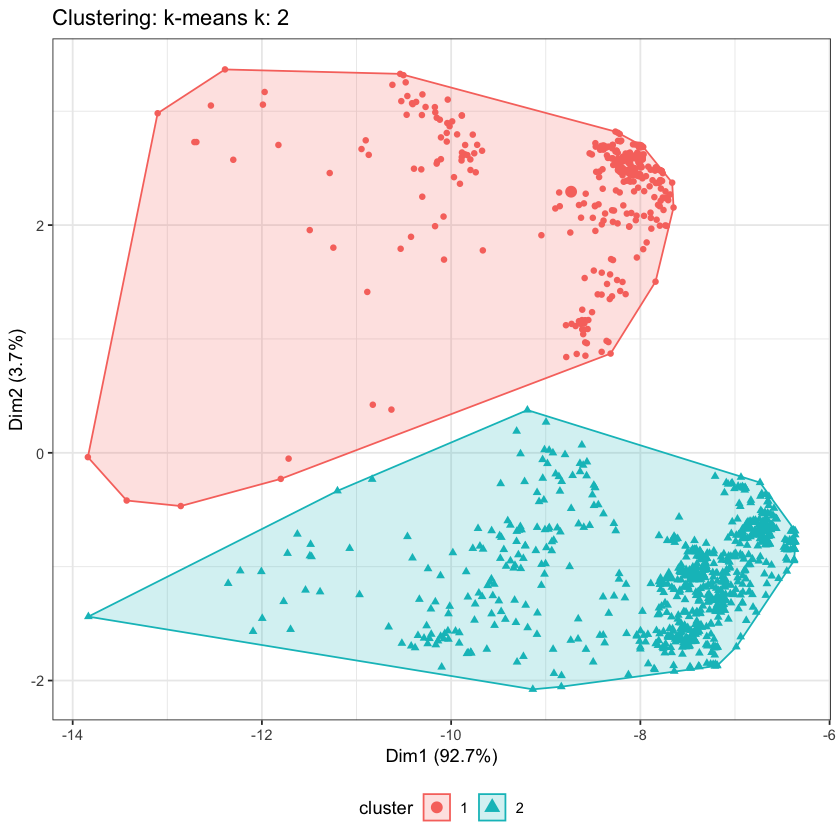

In [19]:
kmeans <- stats::kmeans(x = data, 
                        centers = range_k[which.max(dunn_kmeans)], 
                        nstart = 25)

plot_kmeans <- factoextra::fviz_cluster(object = kmeans,
                                        data = data,
                                        stand = F, 
                                        geom =  'point', 
                                        ellipse.type = 'convex',
                                        ellipse = T,
                                        main = paste('Clustering: k-means k:', range_k[which.max(dunn_kmeans)]),
                                        outlier.color = 'black',
                                        show.clust.cent = T)

plot_kmeans <- plot_kmeans + 
  theme_bw() +
  theme(legend.position = 'bottom')  

plot_kmeans
